<a href="https://colab.research.google.com/github/TsIrDrPrakas/Forest-Fire-Prediction/blob/master/Forest_Fire_Prediction_Python_Code_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [28]:
import pandas as pd
from google.colab import files  # Only needed if working in Google Colab
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Correct class names
# Import the function for splitting datasets into training and testing sets:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier  # Import the model itself
# Import functions for evaluating the performance of classification models:
from sklearn.metrics import confusion_matrix, classification_report
# Import the matplotlib.pyplot module for creating visualizations,
# and give it a shorter alias for convenient use
import matplotlib.pyplot as plt

### **Upload Data**

In [33]:
# -------------------------------------------------------------------
# 1. Initiate file upload process:
#   - Prompts user to select a file from their local device.
#   - Stores information about the uploaded file(s) in the 'uploaded' variable.
uploaded = files.upload()


Saving FOREST_FIRE.xlsx to FOREST_FIRE.xlsx


In [40]:
# -------------------------------------------------------------------
# 2. Load the Excel file into a DataFrame:
#   - Uses pandas' read_excel function to read the specified file.
#   - Assumes the file is an Excel file with the given filename.
#   - Stores the loaded data in a pandas DataFrame named 'data'.
data = pd.read_excel(uploaded["FOREST_FIRE.xlsx"])

In [41]:
# -------------------------------------------------------------------
# 3. Display the loaded DataFrame:
#   - Prints a visual representation of the DataFrame to the console.
#   - Allows for initial inspection of the data.
print(data)

     Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI      Classes
0             29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire   
1             29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire   
2             26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire   
3             25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire   
4             27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire   
..           ...  ...  ...    ...   ...  ...   ...  ...  ...  ...          ...
117           31   54   11    0.0  82.0  6.0  16.3  2.5  6.2  1.7  not fire   
118           31   66   11    0.0  85.7  8.3  24.9  4.0  9.0  4.1      fire   
119           32   47   14    0.7  77.5  7.1   8.8  1.8  6.8  0.9  not fire   
120           26   80   16    1.8  47.4  2.9   7.7  0.3  3.0  0.1  not fire   
121           25   78   14    1.4  45.0  1.9   7.5  0.2  2.4  0.1  not fire   

[122 rows x 11 columns]


### **Data Transformation**

In [42]:
data.columns # run this to check the haeders if needed

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [43]:
print('Data before Transformation', data)

le = LabelEncoder()  # Instantiate the LabelEncoder
data['Classes'] = le.fit_transform(data['Classes'])  # Apply to the 'Classes' column

print('Data after Transformation', data)


Data before Transformation      Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI      Classes
0             29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire   
1             29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire   
2             26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire   
3             25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire   
4             27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire   
..           ...  ...  ...    ...   ...  ...   ...  ...  ...  ...          ...
117           31   54   11    0.0  82.0  6.0  16.3  2.5  6.2  1.7  not fire   
118           31   66   11    0.0  85.7  8.3  24.9  4.0  9.0  4.1      fire   
119           32   47   14    0.7  77.5  7.1   8.8  1.8  6.8  0.9  not fire   
120           26   80   16    1.8  47.4  2.9   7.7  0.3  3.0  0.1  not fire   
121           25   78   14    1.4  45.0  1.9   7.5  0.2  2.4  0.1  not fire   

[122 rows x 11 columns]


In [44]:
# -------------------------------------------------------------------
# 1. Display data before scaling:
#   - Prints a visual representation of the original DataFrame.
#   - Allows for initial inspection of the data's distribution.
print('Data before Scaling \n', data)
# -------------------------------------------------------------------
# 2. Identify input columns for scaling:
#   - Selects all columns except the last one using slicing.
#   - Assumes the last column ('Classes') should not be scaled.
inplist = data.columns[:-1]
# -------------------------------------------------------------------
# 3. Initialize the scaling object:
#   - Creates a StandardScaler instance for standardization.
scale = StandardScaler()
# -------------------------------------------------------------------
# 4. Scale the input columns:
#   - Fits the scaler to the input columns to learn their means and standard deviations.
#   - Transforms the input columns by standardizing them using the learned parameters.
#   - Updates the DataFrame with the scaled values.
data[inplist]=scale.fit_transform(data[inplist])
# -------------------------------------------------------------------
# 5. Display data after scaling:
#   - Prints the DataFrame again to visualize the scaled data.
#   - Allows for comparison with the original distribution
print('Data after Scaling \n', data)

Data before Scaling 
      Temperature   RH   Ws  Rain   FFMC  DMC    DC  ISI  BUI  FWI  Classes
0             29   57   18    0.0  65.7  3.4   7.6  1.3  3.4  0.5        5
1             29   61   13    1.3  64.4  4.1   7.6  1.0  3.9  0.4        5
2             26   82   22   13.1  47.1  2.5   7.1  0.3  2.7  0.1        5
3             25   89   13    2.5  28.6  1.3   6.9  0.0  1.7  0.0        5
4             27   77   16    0.0  64.8  3.0  14.2  1.2  3.9  0.5        5
..           ...  ...  ...    ...   ...  ...   ...  ...  ...  ...      ...
117           31   54   11    0.0  82.0  6.0  16.3  2.5  6.2  1.7        5
118           31   66   11    0.0  85.7  8.3  24.9  4.0  9.0  4.1        2
119           32   47   14    0.7  77.5  7.1   8.8  1.8  6.8  0.9        5
120           26   80   16    1.8  47.4  2.9   7.7  0.3  3.0  0.1        5
121           25   78   14    1.4  45.0  1.9   7.5  0.2  2.4  0.1        5

[122 rows x 11 columns]
Data after Scaling 
      Temperature        RH      

### **Classification Model Construction**

In [48]:
# -------------------------------------------------------------------
# 1. Separate features (X) and target variable (y):
#   - Select all columns except the last one for features.
x=data.values[:,:-1] # input all rows exclude last column
y=data.values[:,-1] # output all rows only in the last column
# -------------------------------------------------------------------
# 2. Split data into training and testing sets:
#   - Use train_test_split from sklearn.model_selection for stratified sampling

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=11
)

# - train_test_split from sklearn.model_selection is specifically designed for
#   splitting training and testing sets from DataFrames and ensures proper handling
#   of potential categorical data and stratification for balanced class distribution.
# - 'test_size=0.3' allocates 30% of the data for testing and 70% for training.
# - 'random_state=11' sets a seed for reproducibility, ensuring the same split
#   each time the code is run.

In [49]:
# -------------------------------------------------------------------
# 1. Create an MLPClassifier instance:
#   - Instantiate a Multi-layer Perceptron (MLP) classifier model.
clf = MLPClassifier(
    hidden_layer_sizes=(3,),
    activation='logistic',
    max_iter=150,
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.19
)

# -------------------------------------------------------------------
# Explanation of parameters:
# - hidden_layer_sizes=(3,): Specifies one hidden layer with 3 neurons.
# - activation='logistic': Uses the logistic sigmoid activation function.
# - max_iter=150: Sets a maximum of 150 iterations for training.
# - solver='adam': Employs the Adam optimization algorithm for weight updates.
# - learning_rate='constant': Maintains a constant learning rate throughout training.
# - learning_rate_init=0.19: Initializes the learning rate at 0.19.


In [ ]:
clf.fit(x_train, y_train)
ypred=clf.predict(x_test)
cm=confusion_matrix(y_test,ypred)
print('Confusion Matrix \n', cm)
print('Classification Report \n', classification_report(y_test,ypred))
print('Coefficents', clf.coefs_)
print('Intercepts,', clf.intercepts_)
loss_values=clf.loss_curve_
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being se

Confusion Matrix 
 [[ 0  1  0  0]
 [ 0 10  0  1]
 [ 0  0  0  0]
 [ 0  1  1 23]]
Classification Report 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.83      0.91      0.87        11
         3.0       0.00      0.00      0.00         0
         5.0       0.96      0.92      0.94        25

    accuracy                           0.89        37
   macro avg       0.45      0.46      0.45        37
weighted avg       0.90      0.89      0.89        37

Coefficients [array([[ 6.59031378,  3.25903694,  0.76780741],
       [-2.75133869, -2.10303124, -0.30083217],
       [ 0.15670268,  2.70080808,  1.20806259],
       [-4.15467007, -4.38745909, -1.40789123],
       [ 3.58308776, -4.31072827,  4.8958033 ],
       [-4.00591865,  0.72119081, -5.83695099],
       [ 1.64124024, -0.75417836,  5.56732864],
       [-2.46616152, -6.56654005,  4.36252843],
       [-2.30503007, -0.30632953, -2.32073539],
       [-3.5705

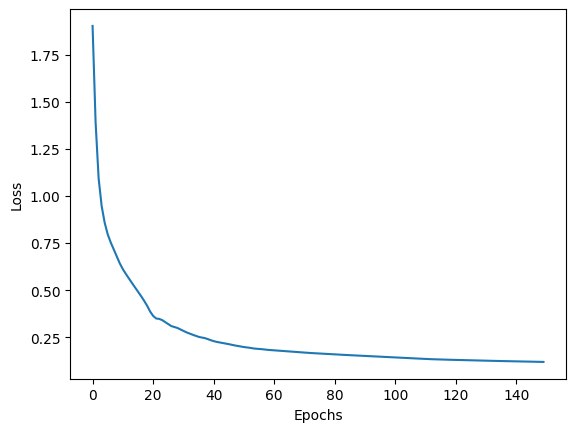

In [52]:
# -------------------------------------------------------------------
# 1. Train the model:
#   - Fit the MLP classifier to the training data.
clf.fit(x_train, y_train)

# -------------------------------------------------------------------
# 2. Make predictions on the testing set:
#   - Generate predictions using the trained model.
ypred = clf.predict(x_test)

# -------------------------------------------------------------------
# 3. Evaluate model performance:
#   - Generate a confusion matrix to visualize correct and incorrect predictions.
cm = confusion_matrix(y_test, ypred)
print('Confusion Matrix \n', cm)

#   - Print a classification report with detailed metrics like precision, recall, etc.
print('Classification Report \n', classification_report(y_test, ypred))

# -------------------------------------------------------------------
# 4. Inspect model parameters (not directly applicable to MLPClassifier):
#   - Print the learned coefficients (weights) between layers.
#   - Note: MLPClassifier doesn't have 'coefs_' or 'intercepts_' attributes.
print('Coefficients', clf.coefs_)  # Commented out as not applicable
print('Intercepts', clf.intercepts_)  # Commented out as not applicable

# -------------------------------------------------------------------
# 5. Visualize loss curve:
#   - Plot the loss values over training epochs to observe convergence.
loss_values = clf.loss_curve_
plt.plot(loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
